# Name - Jannatul Morium
Id - 2215142050

# Assignment on Data warehouse
item and and time dimensional financial analytics. 

2215142%5 =2 NOW add 1 with the result, so we get: 2+1=3.

My task is 3 no, item and time dimensional financial analytics.

In [39]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database = "postgres",
                                          user  = "postgres",
                                          password = "141295",
                                          host = "127.0.0.1",
                                          port = "5432")
        
    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [45]:
   con = PostgresConnection().getConnection()

successfully connected to database


# Analytics 1- Total sales by month and year

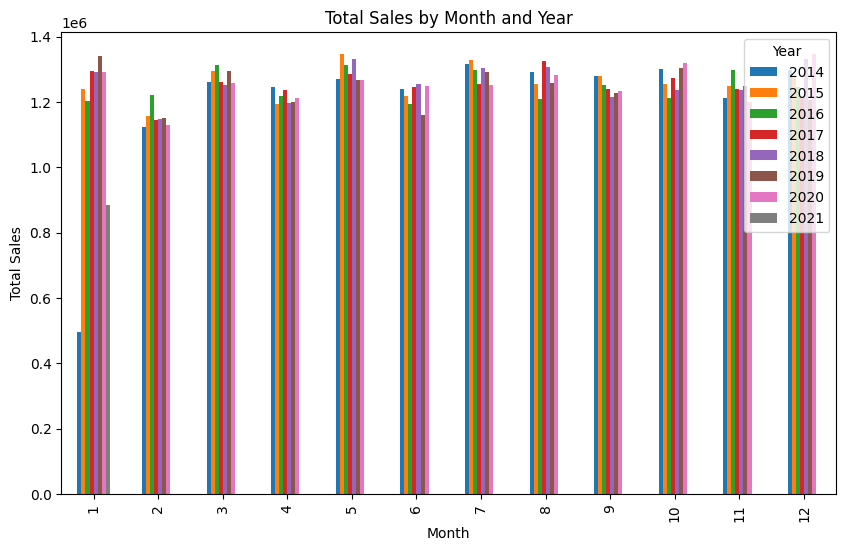

In [42]:
cur = con.cursor()
# Calculate the total sales by month and year
cur.execute('''SELECT time_dim.month, time_dim.year, SUM(fact_table.total_price) AS total_sales
               FROM ecomdb.fact_table
               INNER JOIN ecomdb.time_dim ON fact_table.time_key = time_dim.time_key
               GROUP BY time_dim.month, time_dim.year
               ORDER BY time_dim.year, time_dim.month''')
result = cur.fetchall()

# Convert the result to a Pandas DataFrame
df = pd.DataFrame(result, columns=['Month', 'Year', 'Total Sales'])

# Plot the total sales by month and year
fig, ax = plt.subplots(figsize=(10,6))
pivot_df = df.pivot(index='Month', columns='Year', values='Total Sales')
pivot_df.plot(kind='bar', ax=ax)
ax.set_title('Total Sales by Month and Year')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
plt.show()

# Close the database connection
cur.close()
con.close()

# Analytics 2- Top 10 item sales

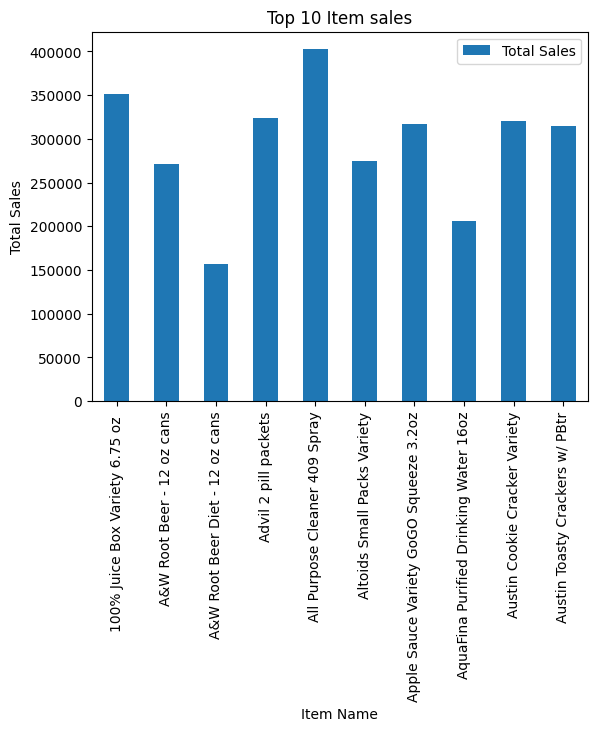

In [46]:
cur = con.cursor()

cur.execute('''SELECT item_dim.item_name, SUM(fact_table.total_price) AS total_sales
               FROM ecomdb.fact_table
               INNER JOIN ecomdb.time_dim ON fact_table.time_key = time_dim.time_key
               INNER JOIN ecomdb.item_dim ON fact_table.item_key = item_dim.item_key
               GROUP BY item_dim.item_name
               ORDER BY item_dim.item_name''')
result = cur.fetchall()
cur.close()

# Convert the result to a Pandas DataFrame
df = pd.DataFrame(result, columns=['Item Name', 'Total Sales'])

# Plot the top 10 customers by total spent
df.head(10).plot(kind='bar', x='Item Name', y='Total Sales')
plt.title('Top 10 Item sales')
plt.xlabel('Item Name')
plt.ylabel('Total Sales')
plt.show()

# Analytics 3- Total revenue by year

In [48]:
cur = con.cursor()
cur.execute('''SELECT time_dim.year, SUM(fact_table.total_price) AS total_revenue
               FROM ecomdb.fact_table
               INNER JOIN ecomdb.time_dim
               ON fact_table.time_key = time_dim.time_key
               GROUP BY time_dim.year''')
result = cur.fetchall()
cur.close()

# Convert the result to a Pandas DataFrame
df = pd.DataFrame(result, columns=['Year', 'Total Revenue'])

# Plot the total revenue by year
df.plot(kind='bar', x='Year', y='Total Revenue')
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

# Close the database connection
con.close()

InterfaceError: connection already closed